# 4 Pre-Processing and Training Data

# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
import graphviz

# Load Data

In [2]:
datascientist_data = pd.read_csv('raw_data/datascientist_data_step3_features.csv')

In [3]:
datascientist_data.head()

,Job Title,Rating,Company Name,Headquarters,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Location City,Location State,Est_Salary,Years_Founded
0,Data Scientist,3.500000,Hopper,"Montreal, Canada",2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,0,New York,NY,146.0,13
1,Data Scientist,4.500000,Noom US,"New York, NY",2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,0,New York,NY,146.0,12
2,DATA SCIENCE MANAGER,3.283576,Decode_M,"New York, NY",-1,Unknown,-1,Unknown,Unknown / Non-Applicable,-1,1,New York,NY,146.0,2021
3,Data Analyst,3.400000,Sapphire Digital,"Lyndhurst, NJ",2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",0,Lyndhurst,NJ,146.0,1
4,DIRECTOR,3.400000,United Entertainment Group,"New York, NY",2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",0,New York,NY,146.0,13


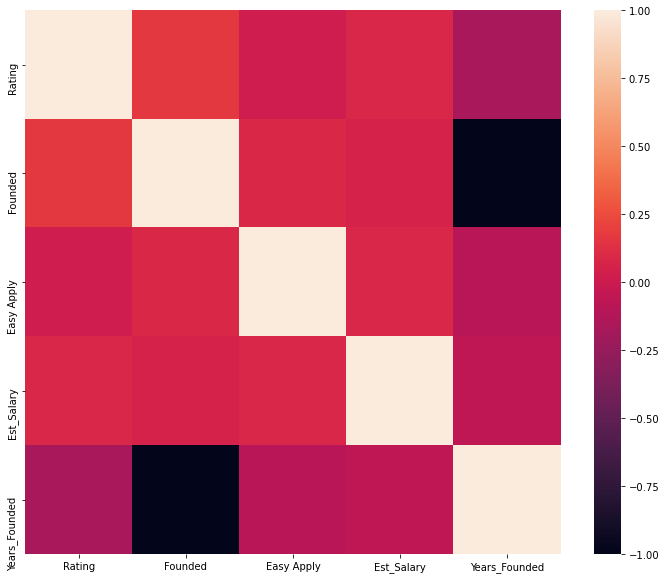

In [4]:
plt.subplots(figsize=(12,10))
sns.heatmap(datascientist_data.corr());

**Create dummy variable for modelling task**

In [5]:
df = datascientist_data[(datascientist_data['Job Title'] == 'Data Scientist') 
                       | (datascientist_data['Job Title'] == 'Data Engineer') 
                       | (datascientist_data['Job Title'] == 'Data Analyst') ] 

In [6]:
df.isnull().sum()

Job Title            0
Rating               0
Company Name         0
Headquarters         0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
Location City        0
Location State       0
Est_Salary           0
Years_Founded        0
dtype: int64

In [7]:
#datascientist_data['Rating'] = datascientist_data['Rating'].replace(-1, mean)
datascientist_data['Rating'] = datascientist_data['Rating'].astype(int).astype('category')

pd.get_dummies(datascientist_data['Rating']).head()

,1,2,3,4,5
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [8]:
datascientist_data['Rating'].dtypes

CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=False)

In [9]:
datascientist_data['Easy Apply'] = datascientist_data['Easy Apply'].astype('category')
pd.get_dummies(datascientist_data['Easy Apply']).head()

,0,1
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [10]:
X = datascientist_data.drop(['Est_Salary'],axis=1, inplace=False)
y = datascientist_data['Est_Salary']

In [11]:
def getDummies(data):
    new_data = pd.get_dummies(data=data, drop_first = True)
    return new_data

X = getDummies(X)
X.head()

,Founded,Years_Founded,Job Title_ACA,Job Title_ACCOUNTING,Job Title_ADJUNCT FACULTY,Job Title_ADMINISTRATIVE ASSISTANT,Job Title_ADOBE ANALYTICS MANAGER,Job Title_ADVANCED ANALYTICS CONSULTING LEAD,Job Title_AI,Job Title_ANALYTICAL,...,Location State_ CA,Location State_ DE,Location State_ FL,Location State_ IL,Location State_ NJ,Location State_ NY,Location State_ OH,Location State_ PA,Location State_ TX,Location State_ United Kingdom
0,2007,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2008,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-1,2021,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2019,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2007,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Train Test Split

Training and Test Datasets When fitting models, we would like to ensure two things:

We have found the best model (in terms of model parameters). The model is highly likely to generalize i.e. perform well on unseen data.

Purpose of splitting data into Training/testing sets We built our model with the requirement that the model fit the data well. As a side-effect, the model will fit THIS dataset well. What about new data? We wanted the model for predictions, right? One simple solution, leave out some data (for testing) and train the model on the rest

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=47)    
X_train.head()

,Founded,Years_Founded,Job Title_ACA,Job Title_ACCOUNTING,Job Title_ADJUNCT FACULTY,Job Title_ADMINISTRATIVE ASSISTANT,Job Title_ADOBE ANALYTICS MANAGER,Job Title_ADVANCED ANALYTICS CONSULTING LEAD,Job Title_AI,Job Title_ANALYTICAL,...,Location State_ CA,Location State_ DE,Location State_ FL,Location State_ IL,Location State_ NJ,Location State_ NY,Location State_ OH,Location State_ PA,Location State_ TX,Location State_ United Kingdom
3485,1983,37,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1456,1983,37,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2912,2014,6,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1081,-1,2021,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
568,1979,41,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [13]:
X_train.shape, X_test.shape

((3127, 3679), (782, 3679))

In [14]:
y_train.shape,y_test.shape

((3127,), (782,))

A good place to start is to see how good the mean is as a predictor. In other words, what if you simply say our best guess is the average salary

In [15]:
#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

108.13383434601855

sklearn's DummyRegressor easily does the same task

In [16]:
#Fit the dummy regressor on the training data
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[108.13383435]])

# Matrics

In [17]:
#create randomforrest Model
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([108.13383435, 108.13383435, 108.13383435, 108.13383435,
       108.13383435])

#### Mean Absolute Error

In [19]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)#y_pred
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))


Mean Absolute Error: 24.26


In [20]:
def mae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed values
    predction -- the predicted values
    """
    abs_error = np.abs(y - ypred)
    mae = np.mean(abs_error)
    return mae

In [21]:
mae(y_test,predictions )

24.25584779614028

#### Mean absolute percentage Accuracy (MAPE

In [22]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Mean absolute percentage Accuracy (MAPE):', round(accuracy, 2), '%.')
print('Mean absolute percentage error (MAPE):', round(np.mean(mape), 2), '%.')

Mean absolute percentage Accuracy (MAPE): 74.78 %.
Mean absolute percentage error (MAPE): 25.22 %.


#### Mean squared error

In [23]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test,predictions)

print('Mean Squared Error',MSE)

Mean Squared Error 1001.4434291972868


To convert this back to our measurement space, we often take the square root, to form the root mean square error:

In [24]:
np.sqrt(MSE)

31.6455909914365

In [25]:
featuredata = rf.feature_importances_
X_col_list =  X.columns.to_list()

In [26]:
featureDf = {'ColLabel' : X_col_list,
            'FeatureImp' : featuredata }
featureDf = pd.DataFrame(featureDf) 
featureDf.sort_values(by='FeatureImp', ascending=False).head(25)

,ColLabel,FeatureImp
3669,Location State_ CA,0.164717
3674,Location State_ NY,0.093677
3626,Location City_San Diego,0.055177
0,Founded,0.020234
1,Years_Founded,0.018433
3573,Location City_Los Angeles,0.016851
133,Job Title_Data Scientist,0.016631
131,Job Title_Data Analyst,0.010897
132,Job Title_Data Engineer,0.010314
3490,Location City_Austin,0.008401


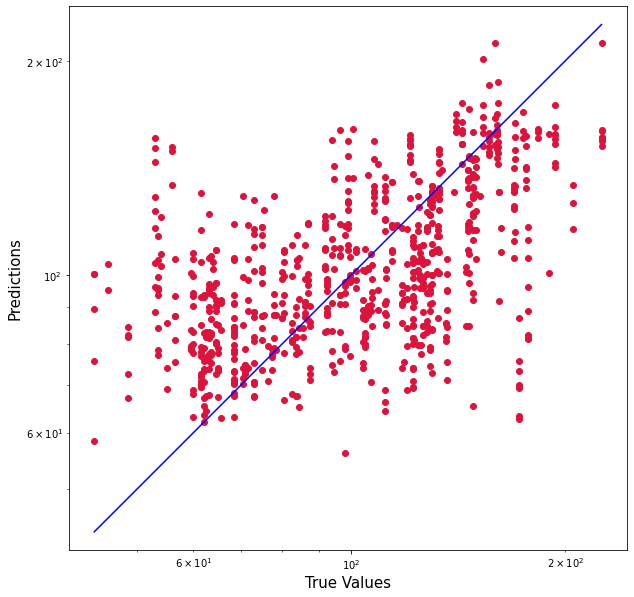

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')

plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

NameError: name 'predicted_value' is not defined

<Figure size 720x720 with 0 Axes>

In [ ]:
import os
datapath = 'raw_data'
# renaming the output data directory and re-running this notebook, for example,
# will recreate this (empty) directory and resave the data files.
# NB this is not a substitute for a modern data pipeline, for which there are
# various tools. However, for our purposes here, and often in a "one off" analysis,
# this is useful because we have to deliberately move/delete our data in order
# to overwrite it.
if not os.path.exists(datapath):
    os.mkdir(datapath)

In [ ]:
datapath_merged_df = os.path.join(datapath, 'datascientist_data_step4_features.csv')

print(datapath_merged_df)
if not os.path.exists(datapath_merged_df):
    df2.to_csv(datapath_merged_df, index=False)
    
    datapath_merged_df = os.path.join(datapath, 'datascientist_data_step4_features.csv')

print(datapath_merged_df)
if not os.path.exists(datapath_merged_df):
    df2.to_csv(datapath_merged_df, index=False)